In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import torch

from torchmin import minimize
from torchmin.benchmarks import rosen

# Rosenbrock func


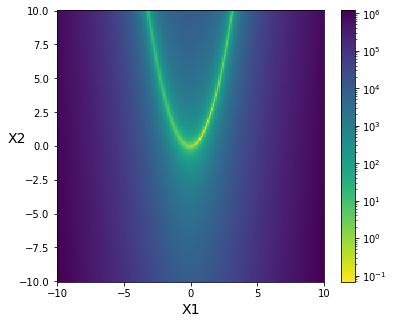

In [4]:
x, y = torch.meshgrid(
    torch.linspace(-10,10,200), 
    torch.linspace(-10,10,200)
)
xy = torch.stack([x, y], -1)
z = rosen(xy, reduce=False)

fig, ax = plt.subplots(figsize=(6,5))
c = ax.pcolormesh(x, y, z, shading='auto', cmap='viridis_r', 
                  norm=LogNorm(vmin=z.min(), vmax=z.max()))
ax.set_xlabel('X1', fontsize=14)
ax.set_ylabel('X2', fontsize=14, rotation=0)
ax.yaxis.set_label_coords(-0.15, 0.5)
fig.colorbar(c, ax=ax)
plt.show()

# 1. Minimize (single point)

In [5]:
x0 = torch.tensor([1., 8.])

rosen(x0)

tensor(4900.)

In [6]:
# BFGS
res = minimize(
    rosen, x0, 
    method='bfgs', 
    options=dict(line_search='strong-wolfe'),
    max_iter=50,
    disp=2
)
print()
print('final x: {}'.format(res.x))

initial fval: 4900.0000
iter   1 - fval: 119.3775
iter   2 - fval: 26.0475
iter   3 - fval: 2.2403
iter   4 - fval: 0.9742
iter   5 - fval: 0.9085
iter   6 - fval: 0.9070
iter   7 - fval: 0.8999
iter   8 - fval: 0.8847
iter   9 - fval: 0.8506
iter  10 - fval: 0.8048
iter  11 - fval: 0.7286
iter  12 - fval: 0.5654
iter  13 - fval: 0.4128
iter  14 - fval: 0.3506
iter  15 - fval: 0.2667
iter  16 - fval: 0.1814
iter  17 - fval: 0.1401
iter  18 - fval: 0.1074
iter  19 - fval: 0.0681
iter  20 - fval: 0.0385
iter  21 - fval: 0.0196
iter  22 - fval: 0.0157
iter  23 - fval: 0.0063
iter  24 - fval: 0.0030
iter  25 - fval: 0.0009
iter  26 - fval: 0.0002
iter  27 - fval: 0.0000
iter  28 - fval: 0.0000
iter  29 - fval: 0.0000
iter  30 - fval: 0.0000
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 30
         Function evaluations: 39

final x: tensor([1.0000, 1.0000])


In [7]:
# L-BFGS
res = minimize(
    rosen, x0, 
    method='l-bfgs', 
    options=dict(line_search='strong-wolfe'),
    max_iter=50,
    disp=2
)
print()
print('final x: {}'.format(res.x))

initial fval: 4900.0000
iter   1 - fval: 119.3775
iter   2 - fval: 2.7829
iter   3 - fval: 2.7823
iter   4 - fval: 2.7822
iter   5 - fval: 2.7818
iter   6 - fval: 2.7810
iter   7 - fval: 2.7785
iter   8 - fval: 2.7723
iter   9 - fval: 2.7563
iter  10 - fval: 2.7187
iter  11 - fval: 2.6477
iter  12 - fval: 2.5353
iter  13 - fval: 2.2997
iter  14 - fval: 1.8811
iter  15 - fval: 1.5526
iter  16 - fval: 1.1877
iter  17 - fval: 1.0779
iter  18 - fval: 0.9352
iter  19 - fval: 0.6669
iter  20 - fval: 0.5938
iter  21 - fval: 0.4380
iter  22 - fval: 0.3308
iter  23 - fval: 0.2343
iter  24 - fval: 0.1972
iter  25 - fval: 0.1279
iter  26 - fval: 0.0869
iter  27 - fval: 0.0695
iter  28 - fval: 0.0473
iter  29 - fval: 0.0298
iter  30 - fval: 0.0158
iter  31 - fval: 0.0065
iter  32 - fval: 0.0029
iter  33 - fval: 0.0004
iter  34 - fval: 0.0001
iter  35 - fval: 0.0000
iter  36 - fval: 0.0000
iter  37 - fval: 0.0000
iter  38 - fval: 0.0000
Optimization terminated successfully.
         Current functio

In [8]:
# Newton CG
res = minimize(
    rosen, x0, 
    method='newton-cg',
    options=dict(line_search='strong-wolfe'),
    max_iter=50, 
    disp=2
)

initial fval: 4900.0000
iter   1 - fval: 6.0505
iter   2 - fval: 2.8156
iter   3 - fval: 2.8144
iter   4 - fval: 2.3266
iter   5 - fval: 2.1088
iter   6 - fval: 1.7060
iter   7 - fval: 1.5851
iter   8 - fval: 1.2548
iter   9 - fval: 1.1625
iter  10 - fval: 0.8967
iter  11 - fval: 0.8249
iter  12 - fval: 0.6160
iter  13 - fval: 0.5591
iter  14 - fval: 0.4051
iter  15 - fval: 0.3299
iter  16 - fval: 0.2217
iter  17 - fval: 0.1886
iter  18 - fval: 0.1167
iter  19 - fval: 0.0987
iter  20 - fval: 0.0543
iter  21 - fval: 0.0442
iter  22 - fval: 0.0210
iter  23 - fval: 0.0118
iter  24 - fval: 0.0035
iter  25 - fval: 0.0021
iter  26 - fval: 0.0005
iter  27 - fval: 0.0000
iter  28 - fval: 0.0000
iter  29 - fval: 0.0000
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 29
         Function evaluations: 84
         CG iterations: 41


In [10]:
# Newton Exact
res = minimize(
    rosen, x0, 
    method='newton-exact',
    options=dict(line_search='strong-wolfe', tikhonov=1e-4),
    max_iter=50, 
    disp=2
)

initial fval: 4900.0000
iter   1 - fval: 0.0000
iter   2 - fval: 0.0000
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3


# minimize (batch of points)

In addition to optimizing a single point, we can also optimize a batch of points.

Results for batch inputs may differ from sequential point-wise optimization due to convergence stopping. Assuming that all points run for `max_iter` iterations, then they should be equivalent up to two conditions:
1. When using line search, the optimal step size at each iteration may differ accross points. Batch mode will select a single step size for all points, whereas sequential optimization will select one per point.
2. When using conjugate gradient (e.g. Newton-CG), there is also convergence stopping for linear inverse sub-problems.

In [11]:
torch.manual_seed(337)
x0 = torch.randn(4,2)

rosen(x0)

tensor(602.9989)

In [12]:
# BFGS
res = minimize(
    rosen, x0, 
    method='bfgs', 
    options=dict(line_search='strong-wolfe'),
    max_iter=50,
    disp=2
)
print()
print('final x: \n{}'.format(res.x))

initial fval: 602.9989
iter   1 - fval: 339.5845
iter   2 - fval: 146.6088
iter   3 - fval: 92.8062
iter   4 - fval: 88.3703
iter   5 - fval: 79.7213
iter   6 - fval: 33.5407
iter   7 - fval: 31.6904
iter   8 - fval: 22.7846
iter   9 - fval: 7.9474
iter  10 - fval: 6.1061
iter  11 - fval: 4.0852
iter  12 - fval: 3.6830
iter  13 - fval: 3.5514
iter  14 - fval: 3.2786
iter  15 - fval: 2.9614
iter  16 - fval: 2.3316
iter  17 - fval: 1.9711
iter  18 - fval: 1.8731
iter  19 - fval: 1.5464
iter  20 - fval: 1.2185
iter  21 - fval: 1.1106
iter  22 - fval: 0.9249
iter  23 - fval: 0.7769
iter  24 - fval: 0.6506
iter  25 - fval: 0.6083
iter  26 - fval: 0.5571
iter  27 - fval: 0.5008
iter  28 - fval: 0.4542
iter  29 - fval: 0.4272
iter  30 - fval: 0.4088
iter  31 - fval: 0.3964
iter  32 - fval: 0.3924
iter  33 - fval: 0.3894
iter  34 - fval: 0.3876
iter  35 - fval: 0.3837
iter  36 - fval: 0.3795
iter  37 - fval: 0.3708
iter  38 - fval: 0.3569
iter  39 - fval: 0.3319
iter  40 - fval: 0.3180
iter  4

In [14]:
# L-BFGS
res = minimize(
    rosen, x0, 
    method='l-bfgs', 
    options=dict(line_search='strong-wolfe'),
    max_iter=50,
    disp=2
)
print()
print('final x: \n{}'.format(res.x))

initial fval: 602.9989
iter   1 - fval: 339.5845
iter   2 - fval: 95.0195
iter   3 - fval: 21.5655
iter   4 - fval: 5.2430
iter   5 - fval: 4.9395
iter   6 - fval: 4.9042
iter   7 - fval: 4.8668
iter   8 - fval: 4.7709
iter   9 - fval: 4.6042
iter  10 - fval: 4.2993
iter  11 - fval: 3.7640
iter  12 - fval: 3.0566
iter  13 - fval: 3.0339
iter  14 - fval: 2.3893
iter  15 - fval: 2.2195
iter  16 - fval: 2.0010
iter  17 - fval: 1.5127
iter  18 - fval: 1.2743
iter  19 - fval: 1.0382
iter  20 - fval: 0.8332
iter  21 - fval: 0.7181
iter  22 - fval: 0.5824
iter  23 - fval: 0.4413
iter  24 - fval: 0.3279
iter  25 - fval: 0.2649
iter  26 - fval: 0.1784
iter  27 - fval: 0.1088
iter  28 - fval: 0.0634
iter  29 - fval: 0.0492
iter  30 - fval: 0.0307
iter  31 - fval: 0.0207
iter  32 - fval: 0.0144
iter  33 - fval: 0.0130
iter  34 - fval: 0.0120
iter  35 - fval: 0.0119
iter  36 - fval: 0.0118
iter  37 - fval: 0.0116
iter  38 - fval: 0.0112
iter  39 - fval: 0.0101
iter  40 - fval: 0.0078
iter  41 - fv

In [15]:
# Newton CG
res = minimize(
    rosen, x0, 
    method='newton-cg', 
    options=dict(line_search='strong-wolfe'),
    max_iter=50,
    disp=2
)
print()
print('final x: \n{}'.format(res.x))

initial fval: 602.9989
iter   1 - fval: 367.2567
iter   2 - fval: 47.2528
iter   3 - fval: 17.9457
iter   4 - fval: 5.0277
iter   5 - fval: 4.5732
iter   6 - fval: 4.2605
iter   7 - fval: 3.5691
iter   8 - fval: 3.1882
iter   9 - fval: 3.0478
iter  10 - fval: 2.9619
iter  11 - fval: 2.5264
iter  12 - fval: 2.1677
iter  13 - fval: 1.8351
iter  14 - fval: 1.7114
iter  15 - fval: 1.3834
iter  16 - fval: 1.1907
iter  17 - fval: 0.8378
iter  18 - fval: 0.7662
iter  19 - fval: 0.5443
iter  20 - fval: 0.4112
iter  21 - fval: 0.2527
iter  22 - fval: 0.2030
iter  23 - fval: 0.1118
iter  24 - fval: 0.0870
iter  25 - fval: 0.0403
iter  26 - fval: 0.0301
iter  27 - fval: 0.0104
iter  28 - fval: 0.0071
iter  29 - fval: 0.0023
iter  30 - fval: 0.0000
iter  31 - fval: 0.0000
iter  32 - fval: 0.0000
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 32
         Function evaluations: 83
         CG iterations: 44

final x: 
tensor([[1.0000, 1.0000],
   

In [16]:
# Newton Exact
res = minimize(
    rosen, x0, 
    method='newton-exact', 
    options=dict(line_search='strong-wolfe', tikhonov=1e-4),
    max_iter=50,
    disp=2
)
print()
print('final x: \n{}'.format(res.x))

initial fval: 602.9989
iter   1 - fval: 5.2148
iter   2 - fval: 4.4287
iter   3 - fval: 3.6888
iter   4 - fval: 2.7710
iter   5 - fval: 1.9319
iter   6 - fval: 1.5444
iter   7 - fval: 1.0819
iter   8 - fval: 0.8638
iter   9 - fval: 0.5068
iter  10 - fval: 0.3768
iter  11 - fval: 0.2248
iter  12 - fval: 0.1487
iter  13 - fval: 0.0758
iter  14 - fval: 0.0412
iter  15 - fval: 0.0125
iter  16 - fval: 0.0055
iter  17 - fval: 0.0003
iter  18 - fval: 0.0000
iter  19 - fval: 0.0000
iter  20 - fval: 0.0000
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 27

final x: 
tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])
